In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Barlow Check<a class='tocSkip'></a>
## Systematic uncertainties: when or when not <a class='tocSkip'></a>
## 0.1 - May 2021 <a class='tocSkip'></a>

> In this notebook, we will investigate the so-called _Barlow Check_.  This is a test, motivated by R.Barlow in [`hep-ex/0207026`](http://www.ippp.dur.ac.uk/Workshops/02/statistics/proceedings//barlow.pdf), to see if a given systematic effect should have an associated systematic uncertainty. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

Roger Barlow, in his proceeding [`hep-ex/0207026`](http://www.ippp.dur.ac.uk/Workshops/02/statistics/proceedings//barlow.pdf), argues that we should be wary of _systematic uncertainties_. R.Barlow uses the definition due to [Orear](http://nedwww.ipac.caltech.edu/level5/Sept01/Orear/frames.html) 

> "Systematic effects" is a general category which includes effects such as background, selection bias, scanning efficiency, energy resolution, angle resolution, variation of counter efficiency with beam position and energy, dead time, etc. The uncertainty in the estimation of such a systematic effect is called a "systematic error". 

Here, we will use _uncertainty_ rather than _error_ to distinguish from systematic _mistakes_.  A systematic _mistake_ comes about if we use apparatus wrongly or fail to correct for in-principle known effects.  Borrowing from both R.Barlow and [P.R.Bevington](http://highered.mheducation.com/sites/0072472278/index.html) an illustration of a systematic mistake could be 

> A student measures the length of a table using a steel ruler.  The ruler was calibrated at $20^{\circ}\mathrm{C}$, and has an expansion coefficient of $0.0005^\circ\mathrm{C}^{-1}$.  The student performs the measurements at a room temperature of $25^{\circ}\mathrm{C}$.  If the student _neglect_ to take into account the expansion of the ruler, then the student would make a systematic _mistake_.  

In so far as possible, we can correct for a mistake, we have no reason to assign additional uncertainties to our results.  Continuing the example above

> If the student has measured the table to be

In [2]:
def pr(value,deltas,inline=False,end=None,**kwargs): 
    from IPython.display import Latex
    from nbi_stat import format_result
    
    dollar = '$' if inline else '$$'
    eqend  = f'\quad{end}' if end else ''
    display(Latex(f'{dollar}'+format_result(value,deltas,latex=True,**kwargs)+f'{eqend}{dollar}'))

l0 = 1.982
pr(l0,None,nsig=4,name='l_0',unit='m')

<IPython.core.display.Latex object>

> long and determined the temperature of the room accurately to be 

In [3]:
t_room = 25
pr(t_room,None,nsig=2,name=r'T_{\mathrm{room}}',unit='{}^{\circ}C',end='.')

<IPython.core.display.Latex object>

> The student may calculate the a _correction_ to the measurement by 

In [4]:
def correction(t_room, t_calib=20, expansion=0.0005):
    return 1+expansion*(t_calib-t_room)

c = correction(t_room)
pr(c,None,name='c',nsig=4,unit=r'{}^{\circ}C^{-1}',end=',')

<IPython.core.display.Latex object>

> and would quote the result to be

In [5]:
def length(measured,correction):
    return measured * correction

l = length(l0,c)
pr(l,None,nsig=4,name='l',unit='m',end='.')

<IPython.core.display.Latex object>

If, on the other hand our correction is not precisely known, then there is an associated systematic uncertainty on our correction.  In that case, we will use regular error propagation to propagate the uncertainty on the correction to our results.  Again, continuing the example above 

> Suppose the aforementioned student could only determine the room temperature to a precision of $\pm2^\circ\mathrm{C}$.  That is, the student has determined the room temperature to be

In [6]:
dt_room = 2 
pr(t_room,dt_room,name='T_{\mathrm{room}}',unit='{}^{\circ}C',end='.')

<IPython.core.display.Latex object>

> The student will again compute the same correction factor ($c=0.9975$), but should also propagate the uncertainty on the measured temperature to the measurement of the length of the table.   The student finds

In [7]:
from nbi_stat import propagate_uncertainty
from numpy import sqrt

dl = sqrt(propagate_uncertainty(lambda t_room : length(l0,correction(t_room)),t_room, dt_room))
pr(l,dl,name='l',unit='m',end='.')

<IPython.core.display.Latex object>

R.Barlow and R.P.Bevington warns us, though, that systematic mistakes must not be interpreted to automatically yield systematic uncertainties.  If a mistake can be identified and corrected for, and that correction has no intrinsic uncertainty, then we must not attribute such an uncertainty.  Again, borrowing from R.P.Bevington and continuing the example above 

> Upon further reflexion the student determines that the measurements were done at an angle which means the students measurement was $2\,\mathrm{mm}$ off on the short side.  The student therefore corrects the results by this constant and finds 

In [8]:
ll0 = l0+0.002
ll  = length(ll0,c)
dll = sqrt(propagate_uncertainty(lambda t_room : length(ll0,correction(t_room)),t_room, dt_room))
pr(ll,dll,name='l',unit='m',end='.')

<IPython.core.display.Latex object>

> This is the students result, corrected for expansion of the ruler, measuring mistake, and taking into account the imprecise knowledge of the room temperature. 

R.Barlow has four points in his paper, roughly given by the sections of that paper.  These are 

1. Distinguish between _mistakes_ and _effects_ (as outlined above).  The former must
   be corrected for, while the latter has associated uncertainties. 
2. Systematic uncertainties are dealt with in the same way as
   statistical uncertainties.  That is, regular error propagation
   applies (as illustrated by `nbi_stat.propagate_uncertainty` above) - albeit with special attention 
   on possible correlations. 
3. Uncertainties on uncertainties are never to be compounded, as
   the process is wholly under-determined.  This is why we
   typically write the error propagation formula with partial
   (rather than full) derivatives with respect to the parameters. 
4. If a "correction" (including calibrations and the like) is
   investigated for systematic effects, and the effect is found to
   be "small", then no systematic uncertainty is to be applied
   (that is, it is deemed negligible" and not included).  R.Barlow
   then spends some time explaining what "small" means in this
   context. 
   
It is the fourth point which is loosely referred to as a _Barlow test_.  It is important to note that R.Barlow does not provide a rigorous formulation of a test, but rather gives qualitative guidelines.  Typically, an analyser finds can find that the variation of a correction has very little effect on the final result - i.e., less than a $1\%$ variation, and would deem the any uncertainty associated with that correction to be negligible.   This is sound practise, and R.Barlow seems to recognise as much.   

# Barlow's first test

Suppose an analyser is estimating the value of $\theta$ using the average 

$$\hat\theta = \frac{1}{N}\sum_{i=1}^N\quad.$$ 

Also suppose that the _population_ variance of $\theta$ is $\sigma^2$.  

The analyser has a sample $S$ from which a (random) sub-sample $T$ is drawn.  The analyser then determines two estimates of $\theta$ 

In [9]:
from sympy import symbols, Sum, IndexedBase, Eq, sqrt, Function
NS, NT, i        = symbols('N_S N_T i',integer=True,nonnegative=True)
nthetaS, nthetaT = symbols('thetahat_S thetahat_T',real=True)
x                = IndexedBase('x')
thetaS           = 1/NS * Sum(x[i],(i,1,NS))
thetaT           = 1/NT * Sum(x[i],(i,1,NT))
display(Eq(nthetaS,thetaS),Eq(nthetaT,thetaT))

Eq(thetahat_S, Sum(x[i], (i, 1, N_S))/N_S)

Eq(thetahat_T, Sum(x[i], (i, 1, N_T))/N_T)

and the associated uncertainties are 

In [10]:
nsigmaS, nsigmaT = symbols('sigmahat_S sigmahat_T',real=True,positive=True)
ndeltaS, ndeltaT = symbols('delta_S delta_T',real=True,positive=True)
deltaS  = 1/(sqrt(NS)*(NS-1)) * Sum((x[i]-nthetaS)**2,(i,1,NS))
deltaT  = 1/(sqrt(NT)*(NT-1)) * Sum((x[i]-nthetaT)**2,(i,1,NT))
deltaSh = nsigmaS/sqrt(NS)
deltaTh = nsigmaT/sqrt(NT)
display(Eq(Eq(ndeltaS,deltaS),deltaSh,evaluate=False),
        Eq(Eq(ndeltaT,deltaT),deltaTh,evaluate=False))

Eq(Eq(delta_S, Sum((-thetahat_S + x[i])**2, (i, 1, N_S))/(sqrt(N_S)*(N_S - 1))), sigmahat_S/sqrt(N_S))

Eq(Eq(delta_T, Sum((-thetahat_T + x[i])**2, (i, 1, N_T))/(sqrt(N_T)*(N_T - 1))), sigmahat_T/sqrt(N_T))

Likewise, we find the covariance between $\hat\theta_S$ and $\hat\theta_T$ to be 

In [11]:
Cov    = Function(r"\mathbb{C}")
CovST  = Cov(nthetaS,nthetaT)
CovST2 = 1/NS * 1/NT * Cov(NS*thetaS,NT*thetaT)
CovSTh = 1/NS*1/NT*NS*Cov(x,x)
Eq(Eq(CovST,CovST2),CovSTh,evaluate=False)

Eq(Eq(\mathbb{C}(thetahat_S, thetahat_T), \mathbb{C}(Sum(x[i], (i, 1, N_S)), Sum(x[i], (i, 1, N_T)))/(N_S*N_T)), \mathbb{C}(x, x)/N_T)

since $\mathbb{C}(aX,bY)=ab\mathbb{C}(X,Y)$.  

If we replace the estimator variances $\hat\sigma_S^2$ and $\hat\sigma_T^2$ over the samples with the population variance $\sigma^2$, and realise that $\mathbb{C}(x,x)=\sigma^2$, we find that 

In [12]:
sigma = symbols('sigma',real=True,nonnegative=True)
deltaSs = deltaSh.subs(nsigmaS,sigma)
deltaTs = deltaTh.subs(nsigmaT,sigma)
CovSTs  = CovSTh.subs(Cov(x,x),sigma**2)
display(Eq(ndeltaS,deltaSs),
        Eq(ndeltaT,deltaTs),
        Eq(Cov(nthetaS,nthetaT),CovSTs))

Eq(delta_S, sigma/sqrt(N_S))

Eq(delta_T, sigma/sqrt(N_T))

Eq(\mathbb{C}(thetahat_S, thetahat_T), sigma**2/N_T)

and we find the correlation to be 

In [13]:
rho = CovSTs/(deltaSs*deltaTs)
nrho = symbols('rho')
Eq(nrho,rho)

Eq(rho, sqrt(N_S)/sqrt(N_T))

Note, R.Barlow writes $\rho=\delta_T/\delta_S$ which is the same as above if we multiply numerator and denominator by $\sigma$. 

To evaluate the difference between the two estimators, we consider 

In [14]:
nDelta = symbols('Delta')
Delta = (nthetaS - nthetaT)
Eq(nDelta,Delta)

Eq(Delta, thetahat_S - thetahat_T)

with the uncertainty 

In [15]:
ndeltaD = symbols('delta_Delta')
deltaD  = ndeltaT**2 + ndeltaS**2 - 2*nrho*ndeltaS*ndeltaT
Eq(ndeltaD**2,deltaD)

Eq(delta_Delta**2, delta_S**2 - 2*delta_S*delta_T*rho + delta_T**2)

Inserting the above, we find 

In [16]:
deltaDs = deltaD.subs({nrho:rho,ndeltaS:deltaSs,ndeltaT:deltaTs})
Eq(ndeltaD**2,deltaDs.subs({deltaSs:ndeltaS,deltaTs:ndeltaT}))

Eq(delta_Delta**2, delta_S**2 - delta_T**2)

Thus, the difference is "small" if the difference in uncertainties is small. 

## Numerical example 

Let us take a concrete numerical example.  We will draw will consider a random variable $X\sim\mathcal{N}$ and generate a sample $S$ from which we will extract a subsample $T\subset S$. 

In [17]:
from numpy.random import default_rng 
from numpy import arange

r = default_rng(123456)
S = r.normal(size=1000)
T = S[r.choice(arange(len(S)),size=800,replace=False)]

We calculate the mean of each sample, as well as the standard error on the mean 

In [18]:
def mean_and_sem(x):
    from numpy import sqrt 
    
    m = x.mean()
    e = x.std(ddof=1)/sqrt(len(x))
    return m,e 

Sr = mean_and_sem(S)
Tr = mean_and_sem(T)
pr(*Sr,name=r'\theta_S')
pr(*Tr,name=r'\theta_T',end='.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We find that the uncertainty on the difference is 

In [19]:
from numpy import sqrt
pr(sqrt(Tr[1]**2-Sr[1]**2),None,name=r'\delta_\Delta',end='.')

<IPython.core.display.Latex object>

# Barlow's second test

Above we considered the case where two samples $S$ and $T$ from the same parent distribution was separately analysed and we were estimating the parent expectation value. 

Next, we consider two ways of estimating $\theta$.  The relation 

In [20]:
Eq(ndeltaD**2,deltaD)

Eq(delta_Delta**2, delta_S**2 - 2*delta_S*delta_T*rho + delta_T**2)

from above still holds, but we may not be able to extract the covariance as easily as before.  

Following R.Barlow, we introduce the weighted average of our estimates 

In [21]:
w = symbols('w',real=True,positive=True)
nthetaW = symbols('thetahat_W')
thetaW = w * nthetaT + (1-w)*nthetaS
Eq(nthetaW,thetaW)

Eq(thetahat_W, thetahat_S*(1 - w) + thetahat_T*w)

Using regular error propagation, we find 

In [22]:
ndeltaW = symbols('delta_W')
diffWT = thetaW.diff(nthetaT)
diffWS = thetaW.diff(nthetaS)
deltaW = diffWT**2*ndeltaT**2 + diffWS**2*ndeltaS**2 + 2*nrho*diffWT*diffWS*ndeltaT*ndeltaS
Eq(ndeltaW**2,deltaW)

Eq(delta_W**2, delta_S**2*(1 - w)**2 + 2*delta_S*delta_T*rho*w*(1 - w) + delta_T**2*w**2)

The value of $w$ where this is minimum is easily found 

In [23]:
from sympy import solve, solveset, S

wmin    = solve(deltaW.diff(w),w)[0]
Eq(symbols('w_min'),wmin)

Eq(w_min, delta_S*(delta_S - delta_T*rho)/(delta_S**2 - 2*delta_S*delta_T*rho + delta_T**2))

and we find the least uncertainty on $\hat\theta_W$ by inserting this value above

In [24]:
deltaWm = deltaW.subs(w,wmin).simplify()
Eq(symbols('delta_W^2'),deltaWm)

Eq(delta_W^2, delta_S**2*delta_T**2*(1 - rho**2)/(delta_S**2 - 2*delta_S*delta_T*rho + delta_T**2))

The _minium variance bound_ theorem (see [Chapter 5 of R.Barlow's book](https://www.wiley.com/en-us/Statistics%3A+A+Guide+to+the+Use+of+Statistical+Methods+in+the+Physical+Sciences-p-9780471922957)) states that for an maximum likelihood estimator there exists a least possible variance $\sigma_0$, so that 

In [25]:
sigma0 = symbols('sigma_0',real=True,nonnegative=True)
deltaWm >= sigma0**2

delta_S**2*delta_T**2*(1 - rho**2)/(delta_S**2 - 2*delta_S*delta_T*rho + delta_T**2) >= sigma_0**2

Recognising the denominator as $\delta_\Delta^2$, we find 

In [26]:
deltaD2 = deltaWm.subs(deltaD,ndeltaD**2)
deltaD2 >= sigma0**2

delta_S**2*delta_T**2*(1 - rho**2)/delta_Delta**2 >= sigma_0**2

We can rearrange this to get 

\begin{align*}
  \frac{\delta_S^2\delta_T^2(1-\rho^2)}{\delta_\Delta^2} &\ge \sigma_0^2\\
  (1-\rho^2) &\ge \frac{\sigma_0^2\delta_\Delta^2}{\delta_S^2\delta_T^2}\\
  -\rho^2    &\ge \frac{\sigma_0^2\delta_\Delta^2}{\delta_S^2\delta_T^2}-1\\
  \rho^2     &\lt 1-\frac{\sigma_0^2\delta_\Delta^2}{\delta_S^2\delta_T^2}\quad.
\end{align*}

Since $0\le\rho^2\le1$, this means that the second term is bound 

\begin{align*}
  0\lt\frac{\sigma_0\delta_\Delta}{\delta_S\delta_T}\lt1\quad,
\end{align*}

since $\sigma_0,\delta_\Delta,\delta_S,$ and $\delta_T$ are all positive.   Note, if $\delta_T=\sigma_0$, as in the case of the most efficient analyses, then 

\begin{align*}
  0\le\frac{\delta_\Delta}{\delta_S}\le 1\quad,
\end{align*} 

That is, if the uncertainty in the difference between analyses is smaller than the alternate analyses, then we have no recourse to assign an additional systematic uncertainty. 

Note, if $\rho=1$ then we find 

$$\sigma_0 \le 0\quad,$$

which is not reasonable. 

## Numerical example

Let us do a numerical example.  We have two ways of estimating $\theta$ - one will reflect the standard analysis and has the result 

In [27]:
a1 = 1
e1 = 0.01
pr(a1,e1,name='a_1')

<IPython.core.display.Latex object>

while the second is some variation resulting in a different uncertainty 

In [28]:
a2 = 1.1
e2 = 0.02
pr(a2,e2,name='a_2')

<IPython.core.display.Latex object>

We will assume _some_ correlation between the methods 

In [29]:
rho = 0.5
pr(rho,None,name=r'\rho')

<IPython.core.display.Latex object>

Thus we find the uncertainty on the difference to be 

In [30]:
from numpy import sqrt 

def calc_delta(a1,a2,e1,e2,rho):
    Delta = a1-a2
    eDelta = sqrt(e1**2+e2**2-2*rho*e1*e2)
    return Delta, eDelta


pr(*calc_delta(a1,a2,e1,e2,rho),name=r'\Delta')

<IPython.core.display.Latex object>

We see that the uncertainty on the difference is the same as the uncertainty on the alternate analyses, and we find no reason to add an additional systematic uncertainty to our standard result.  If we had a larger  correlation coefficient, then 

In [31]:
rho = 0.75
pr(*calc_delta(a1,a2,e1,e2,rho),name=r'\Delta')

<IPython.core.display.Latex object>

and we would likewise no attribute any additional systematic uncertainty.    

Let us plot $\delta_\Delta/\delta_2$ as a function of $\delta_2/\delta_1$ and $\rho$ to get a better idea of how this behaves. 

In [32]:
def rcalc_delta(er,rho):
    e1     = 1
    e2     = er * e1
    eDelta = sqrt(e1**2+e2**2-2*rho*e1*e2)
    return eDelta

def plot_ratio(surf3D=False):
    from matplotlib.pyplot import figure, colorbar
    from numpy import meshgrid, linspace, geomspace

    ee,rr = meshgrid(geomspace(0.1,2,100),
                     linspace(0,   1,100))
    ff    = lambda e,r : rcalc_delta(e,r)
    yy    = ff(ee,rr)/ee

    fig = figure()
    if surf3D:
        from mpl_toolkits.mplot3d import Axes3D
        ax  = fig.add_subplot(111,projection='3d')
        ax.view_init(None,105)
        ax.plot_surface(ee,rr,yy)
        ax.set_zlabel(r'$\delta_\Delta/\delta_2$')
    else:
        ax  = fig.add_subplot(111)
        cb  = colorbar(ax.contourf(ee,rr,yy,levels=100))
        cb.set_label(r'$\delta_\Delta/\delta_2$')
    
    ax.set_xlabel(r'$\delta_2/\delta_1$')
    ax.set_ylabel(r'$\rho$')
    
    return fig

In [33]:
plot_ratio();

As we see from the plot above, the ratio $\delta_\Delta/\delta_2$ only exceeds unity if $\delta_2/\delta_1$ is very small. Indeed, if our alternate analysis yields an uncertainty smaller than the standard analyses the assumption $\delta_T=\sigma_0$ is broken. 

## Another numerical example 

An analyser is calibrating a response function.  The "true" response function is 

$$f(x) = x + 0.3 x^2\quad.$$ 

We generate some data over $x\in[0,1]$ where we smear each point by a normal distribution and assign an uncertainty to each point as well. 

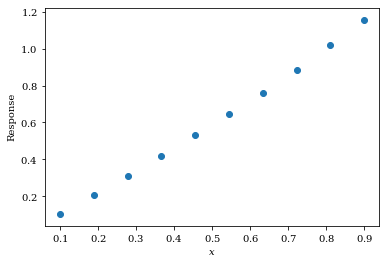

In [34]:
from numpy import linspace, full_like, sqrt
from matplotlib.pyplot import gca

r =  default_rng(123456)
x =  linspace(0.1,0.9,10)
s =  r.normal(x+0.3*x**2,0.1,size=(100,len(x)))
y =  s.mean(axis=0)
e =  s.std(axis=0,ddof=1)/sqrt(s.shape[0])

ax  = gca()
ax.set_xlabel('$x$')
ax.set_ylabel('Response')
ax.errorbar(x,y,e,fmt='o');

The analyser fit a straight line to the calibration data. 

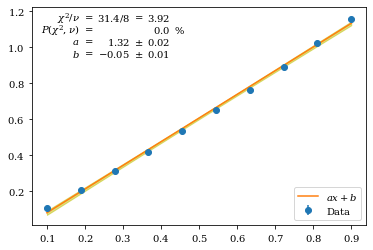

In [35]:
from nbi_stat import fit, plot_fit

def f1(x,slope,intersect):
    return slope * x + intersect 

p1, cov1 = fit(f1, x, y, (0,1), e)
plot_fit(x, y, e, f1, p1, cov1,
         data={'fmt':'o','label':'Data'},
         table={'loc':'upper left'},
         parameters=['a','b'],
         fit={'label':'$ax+b$'},
         legend={'loc':'lower right'});

The analyser finds a slope of 

In [36]:
pr(p1[0],sqrt(cov1[0,0]),name='a')

<IPython.core.display.Latex object>

As a cross-check, the analyser decides to fit straight lines to data in two ranges: $[0,0.5]$ and $[0.5,1]$. 

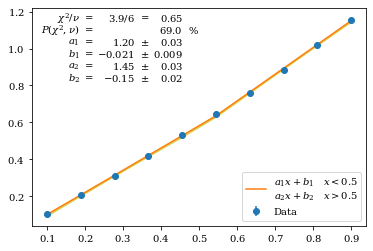

In [37]:
def f2(x,a1,b1,a2,b2):
    from numpy import hstack 
    return hstack((a1 * x[x<0.5] + b1,
                   a2 * x[x>0.5] + b2))
p2, cov2 = fit(f2,x,y,(1,0,1,0),e)
plot_fit(x, y, e, f2, p2, cov2,
         data={'fmt':'o','label':'Data'},
         table={'loc':'upper left'},
         parameters=['a_1','b_1','a_2','b_2'],
         fit={'label':r'$a_1x+b_1\quad x < 0.5$'+'\n'+r'$a_2x+b_2\quad x>0.5$'},
         legend={'loc':'lower right'});

and finds the slopes 

In [38]:
pr(p2[0],sqrt(cov2[0,0]),name='a_1')
pr(p2[2],sqrt(cov2[2,2]),name='a_2')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

If the analyser fails to recognise that the linear parameterisation is inadequate (c.f. the low $\chi^2$ probability of the first fit), then the analyser may be tempted to assign a systematic uncertainty of 0.12 to $a$

In [39]:
pr(p1[0],[sqrt(cov1[0,0]),0.12],name='a')

<IPython.core.display.Latex object>

which is relatively large ($9\%$ relative uncertainty) and would surely inflate the uncertainties of the final results.  Instead, the analyser should pay due attention to the discrepancy of the results and ask one self if perhaps the linear model is incorrect. 

Note, in cases like this, where we are parameterising data with no prior knowledge or assumption of the relationship, we should strive to get a reasonable $\chi^2$ probability (i.e., $>50\%$).  If we do so, we know that we have the good (if not the best) possible description of the data and there is obviously no reason to assign further systematic uncertainties. The diligent analyser would try other fit functions, for example a second order polynomial 

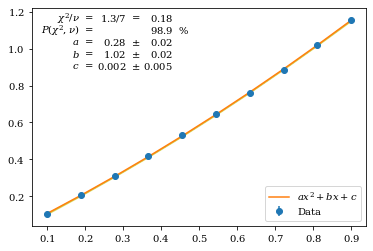

In [40]:
def f3(x,a,b,c):
    return a*x**2+b*x+c

p3, cov3 = fit(f3,x,y,(0,1,0),e)
plot_fit(x, y, e, f3, p3, cov3,
         data={'fmt':'o','label':'Data'},
         table={'loc':'upper left'},
         parameters=['a','b','c'],
         fit={'label':r'$ax^2+bx+c$'},
         legend={'loc':'lower right'});

Clearly, this parameterisation of the data leaves no room for assigning additional uncertainties. 

# Summary 

The so-called "Barlow Check", despite the hype surrounding it (see [list of papers](https://inspirehep.net/literature?q=refersto%3Arecid%3A590094) citing [hep-ex/0207026](https://inspirehep.net/literature/590094)), is a qualitative recommendation to be diligent when investigating systematic effects.  The recommendation can be boiled down to 

- Investigate your analysis for systematic effects.  Examples are 
  - Vary cut values 
  - Choose different fit models 
  - Choose an entirely different analysis approach 
- If a systematic effect is found, then make every effort to understand that effect. 
  - Did you make a mistake? In that case, correct it and repeat the investigation 
  - Is the effect small? If so, your analysis is marginally effected and you can move on. 
  - If the effect is large, then double and triple check for mistakes.  If the discrepancy persist you may as a last resort assign a systematic uncertainty paying close attention to correlations. 
- If no systematic effects are found, your analysis is sound, and you can move on. 

The culprit here is of course what we mean by "small" or "large" effect.  Despite the efforts of R.Barlow as outlined above, there are no _quantitative_, rigorous prescription given.   R.Barlow suggests to look at the uncertainty of the difference between two analyses and give a qualitative answer to when an effect is "small" - namely when 

$$\frac{\delta_\Delta}{\delta_{\mathrm{alternate}}}\le 1\quad.$$ 

That is, the difference between the "standard" and "alternate" analyses is compatible with the uncertainties on the "alternate" analyses.  Clearly, such a recommendation is sound and in many ways describes best practises already employed within various analysis traditions. 

It is important to note that "large" does _not_ mean 
  
$$\frac{\delta_\Delta}{\delta_{\mathrm{alternate}}}\gt 1\quad.$$ 

Depending on the nature of the "standard" and "alternate" analyses the requirement for "large" could mean that the number on the right should be 3, 4, 5, or some other "large" number.  Again, the qualitative recommendation is to consider the source of the systematic effect and try to argue whether or not it warrants a systematic uncertainty.

Note, the overall point and recommendations of R.Barlow's paper _are_ sound.

The bad news is that R.Barlow's paper does not help us decide what is a systematic uncertainty and what is not.  The good news is that what we already do is actually the best we can do.  The art of analysis still lies in the assignment (or not) of systematic uncertainties. 